# [CSE426] Image Processing
Teaching Assistant: Hyunmin Ban (hmban1996@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P6: Template Matching & Motion Estimation

## P6.A: Template Matching (3점)

### 실습내용
실습은 다음 순서로 진행됩니다.
- 0) 실습에서 사용되는 패키지 import
- 1) 주어진 이미지 loading
- 2) 함수 정의
- 3) Matplotlib로 이미지 확인

### 점수
- 빈칸 합 3점

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export (Download) as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.
- e-campus에 .ipynb 파일과 .html 파일을 zip파일로 하지 말고 따로따로 올리세요.

## Imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

## 1) Load Image

In [3]:
img = cv2.imread('Hurricane.tif', cv2.IMREAD_GRAYSCALE) # 이미지 파일 읽기
template = cv2.imread('eye_template.tif', cv2.IMREAD_GRAYSCALE)

cv2.imshow('image', img)
cv2.imshow('template', template)
cv2.waitKey(0)                
cv2.destroyAllWindows()       

## 2) Define Function

**요구사항**
- 1) 이번 P6.A 실습과제는 template matching으로, 주어진 태풍 사진(image)에서 태풍의 눈(template)을 찾는게 목적입니다
- 2) OpenCV의 matchTemplate 함수와 minMaxLoc 함수를 사용해서 태풍 사진에서 태풍의 눈을 찾으세요
- 3) template matching 함수에서 match_result은 OpenCV의 matchTemplate 함수의 결과입니다 
- 4) template matching 함수에서 plane은 image에 matching 된 box를 그리기 위해 넣었습니다

In [4]:
def template_matching(image, template):
    height, width = template.shape
    match_result = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match_result)
    top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)
    plane = image.copy()
    
    cv2.cvtColor(plane, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(plane, top_left, bottom_right, (0,255,0), 4)
    match_result = cv2.normalize(match_result, None, 0, 255, cv2.NORM_MINMAX)
    match_result = match_result.astype('uint8')

    return match_result, plane


In [5]:
match_result, detected_point = template_matching(img, template)

## 3) Plot Image

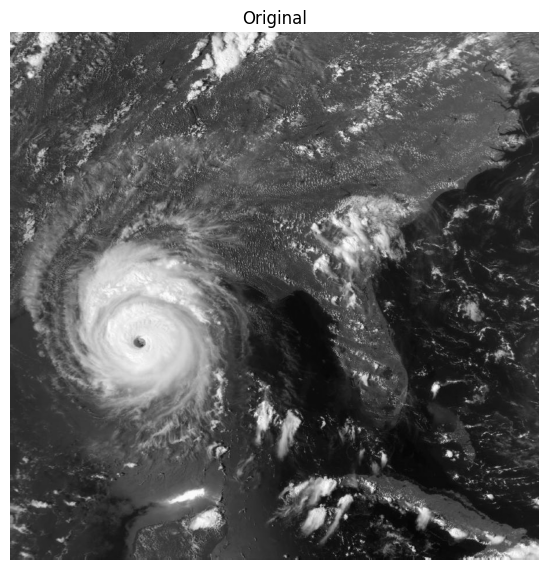

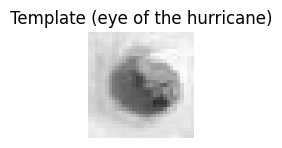

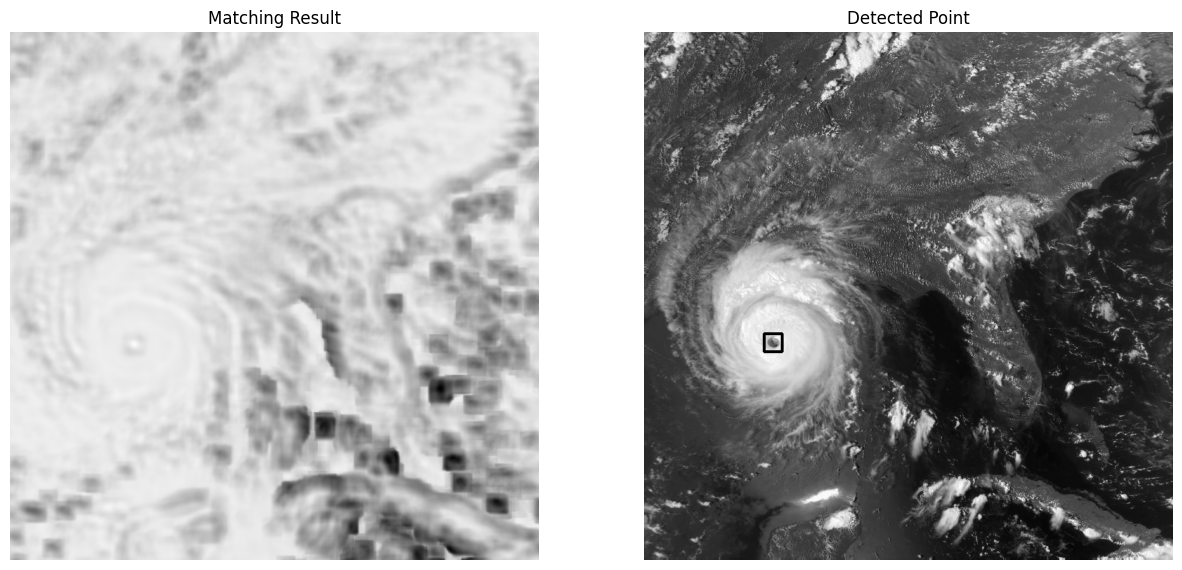

In [6]:
fig = plt.figure(figsize = (15, 10))
rows = 1
cols = 2
  
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
ax1.set_title('Original')
ax1.axis("off")

fig = plt.figure(figsize = (3, 3))
ax2 = fig.add_subplot(rows, cols, 1)
ax2.imshow(cv2.cvtColor(template, cv2.COLOR_GRAY2RGB))
ax2.set_title('Template (eye of the hurricane)')
ax2.axis("off")

fig = plt.figure(figsize = (15, 10))
ax3 = fig.add_subplot(rows, cols, 1)
ax3.imshow(cv2.cvtColor(match_result, cv2.COLOR_GRAY2RGB))
ax3.set_title('Matching Result')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 2)
ax4.imshow(cv2.cvtColor(detected_point, cv2.COLOR_BGR2RGB)) # 태풍의 눈을 찾습니다
ax4.set_title('Detected Point')
ax4.axis("off")

plt.show()

---

## P6.B: Motion Estimation and Compensation (7점)

### 실습내용
실습은 다음 순서로 진행됩니다.
- 1) 이미지 loading
- 2) 함수 구현
- 3) Matplotlib로 이미지 확인
- 4) Discussion

### 점수
- 2) 빈칸에 대한 합 7점
- Discussion 내용이 부실하면 감점

## 1) Load Image

In [7]:
img1 = cv2.imread('tennis_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('tennis_2.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('image1', img1)
cv2.imshow('image2', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 2) Define Function

**요구사항**
- 이번 P6.B 실습과제는 Motion Estimation과 Motion Compensation 구현입니다  
  
**Motion Estimation**
- 1) 현재 이미지에서 block size 만큼 이미지를 나눕니다
- 2) search_range는 이전 이미지에서 참조 할 영역의 크기를 정합니다, 이때 이전 이미지에 padding을 미리 수행하며 아래 사진은 첫 번째 block과 이에 해당하는 search range에 대한 예시로 첫 번째 block은 top, left 방향에 pixel이 없기 때문에 padding을 해줍니다
- 3) 현재 이미지(코드에서는 current_image)의 각 block마다 이전 이미지(코드에서는 padded_ref)의 search range 이내에서 OpenCV의 matchTemplate 함수를 수행해서 block과 가장 비슷한 위치를 찾습니다
- 4) OpenCV의 matchTemplate 함수를 사용할 때 method는 TM_SQDIFF를 사용하세요
- 5) 3)에서 구한 위치 값(top_left)과 block의 위치 값(top_left)을 빼줘서 vector 값을 구하고 vector 값을 motion_vector에 저장하세요
- 6) chart는 optical flow를 나타내기 위해 만들었으며 예시 코드를 사용하시면 됩니다
  
**Motion Compensation**
- 1) Motion Compensation은 Motion Estimation에서 구한 motion vector와 이전 이미지를 입력으로 받습니다
- 2) 출력값은 움직임 보상 된 이미지(compensated_image)로 0 값을 가지고 이전 이미지와 같은 크기를 가진 이미지로 초기화 합니다
- 3) 앞서 구한 motion vector로 이전 이미지의 예측 된 block을 보상 된 이미지에 넣습니다

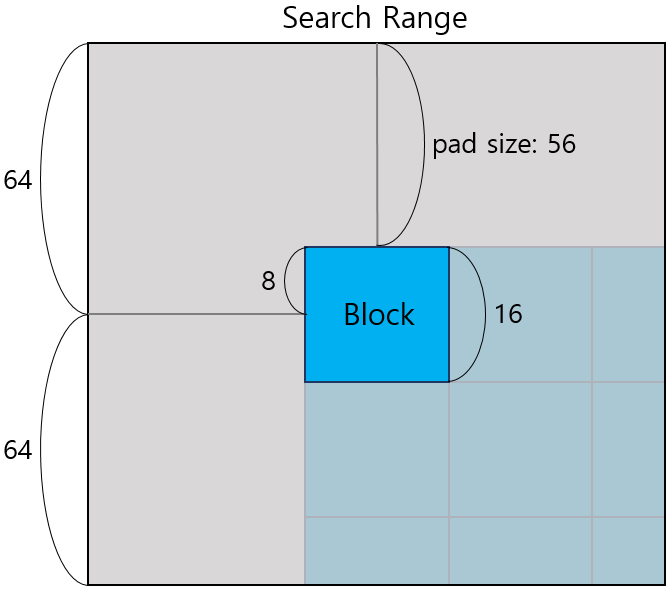

In [40]:
# 이미지의 차이를 계산하는 함수로 reference (이전 이미지) image (현재 이미지)의 차이를
# 0 ~ 255 값으로 나타냅니다
def img_diff(reference, image):
    diff = (image.astype('float') - reference.astype('float')) / 2
    diff = np.clip(diff + 128., 0, 255).astype('uint8')
    return diff

In [56]:
def motion_estimation(reference, current_image, block_size, search_range, optical_flow_toggle=True):
    height, width = reference.shape
    chart = np.ones_like(reference) * 255
    
    pad = int((search_range - block_size) / 2)
    padded_ref = cv2.copyMakeBorder(reference, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=255)
    
    n_blocks_h, n_blocks_w = height // block_size, width // block_size
    
    ref_blocks = np.zeros((block_size + 2 * pad, block_size + 2 * pad, n_blocks_h, n_blocks_w))
    current_blocks = np.zeros((block_size, block_size, n_blocks_h, n_blocks_w))

    for i in range(n_blocks_h):
        x = i * block_size
        for j in range(n_blocks_w):
            y = j * block_size
            
            ref_blocks[:, :, i, j] = padded_ref[x:x + block_size + 2 * pad, y:y + block_size + 2 * pad]
            current_blocks[:, :, i, j] = current_image[x:x + block_size, y:y + block_size]
    
    motion_vectors = []
    for i in range(n_blocks_h):
        for j in range(n_blocks_w):
            current_block = current_blocks[:, :, i, j]
            
            min_mse = float('inf')
            best_i, best_j = 0, 0
            
            for i_off in range(-search_range, search_range + 1):
                if i + i_off < 0 or i + i_off >= n_blocks_h:
                    continue
                
                for j_off in range(-search_range, search_range + 1):
                    if j + j_off < 0 or j + j_off >= n_blocks_w:
                        continue
                        
                    ref_block = ref_blocks[:, :, i + i_off, j + j_off]
                    
                    if current_block.shape != ref_block.shape:
                        continue
                    
                    mse = np.sum((current_block.astype('float') - ref_block.astype('float')) ** 2)
                    if mse < min_mse:
                        min_mse = mse
                        best_i, best_j = i_off, j_off
            
            motion_vectors.append((best_i, best_j))
            
            if optical_flow_toggle:
                x_flow, y_flow = best_j * block_size, best_i * block_size
                cv2.arrowedLine(chart, (y * block_size + block_size // 2, x * block_size + block_size // 2),
                                (y * block_size + block_size // 2 + y_flow, x * block_size + block_size // 2 + x_flow), 
                                (0, 0, 0))
                    
    return motion_vectors, chart


In [60]:
def motion_compensation(reference, motion_vector, block_size, search_range):
    height, width = reference.shape
    compensated_image = np.zeros_like(reference)
    pad = int((search_range - block_size) / 2)

    for i in range(int(height / block_size)):
        x = i * block_size
        for j in range(int(width / block_size)):
            y = j * block_size
            mv = motion_vector[i * int(width / block_size) + j]
            ref_blk = reference[x:x+block_size, y:y+block_size]
            ref_x, ref_y = y + mv[0], x + mv[1]
            if ref_x < 0 or ref_y < 0 or ref_x + block_size > width or ref_y + block_size > height:
                # motion vector가 영상을 벗어날 경우 보상하지 않음
                continue
            compensated_image[x:x+block_size, y:y+block_size] = reference[ref_y:ref_y+block_size, ref_x:ref_x+block_size]

    return compensated_image


In [61]:
# 아래 Parameter는 제출할 때 수정하지 마세요
# block size: 16, search range: 128
diff = img_diff(img1, img2)                            
vectors, chart = motion_estimation(img1, img2, 16, 128) 
comp_img = motion_compensation(img1, vectors, 16, 128)  
mc_diff = img_diff(comp_img, img2)                     

## 3) Plot Image

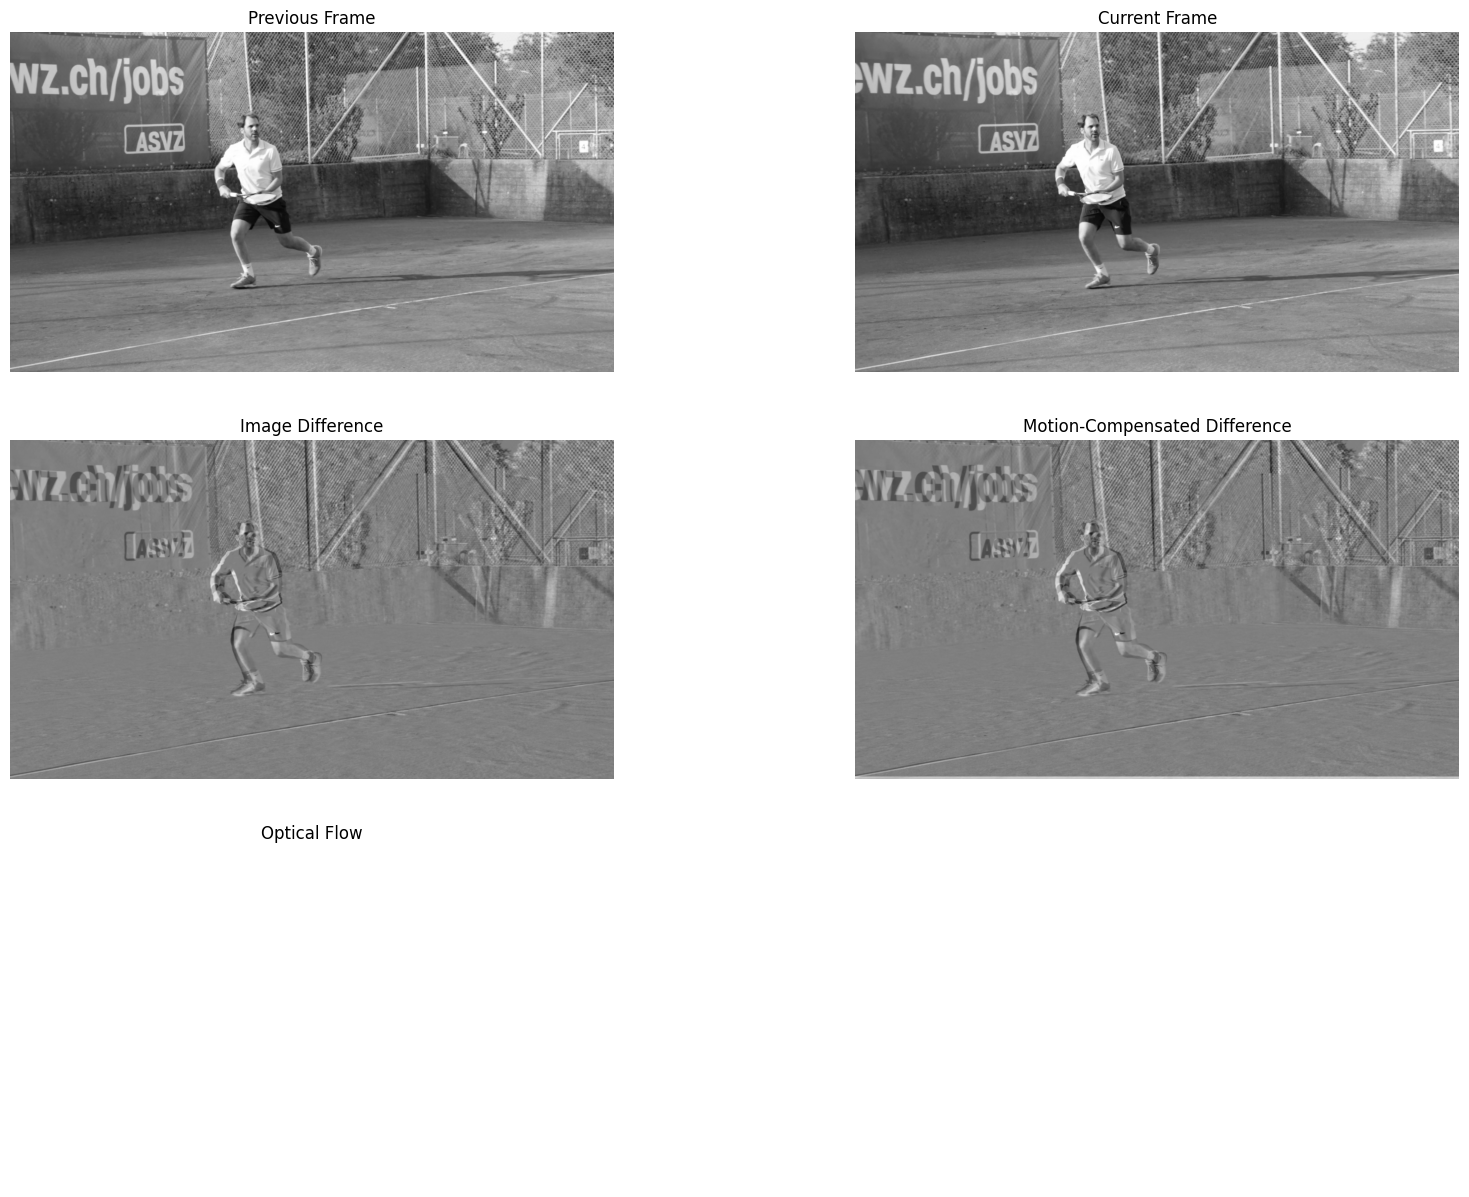

In [62]:
plt.figure(figsize = (20, 15))
images = {'Previous Frame':img1, 'Current Frame':img2, 'Image Difference':diff,
          'Motion-Compensated Difference': mc_diff, 'Optical Flow':chart}

for i, (k, v) in enumerate(images.items()):
    plt.subplot(3,2,i+1)
    plt.title(k)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_GRAY2RGB))
    plt.axis("off")
    
plt.show()

## 4) Discussion

**1) Template Matching에 대해 간략하게 설명하세요.**

Template Matching은 이미지에서 특정한 패턴이나 객체를 찾기 위해 사용되는 알고리즘이다. 

Template을 대상 이미지에서 슬라이딩 윈도우 방식으로 이동하면서 대상 이미지의 각 위치에서 템플릿과 일치하는 정도를 측정하여 일치하는 정도가 가장 높은 위치를 찾아낸다. 

Template Matching은 간단하고 직관적이지만, 이미지에 대한 정보가 제한적이거나 배경이 복잡하거나 변화에 취약한 단점이 있다.

**2) Motion Estimation과 Motion Compensation 과정에 대해 설명하세요.**

Motion Estimation은 연속적인 영상에서 물체나 카메라의 움직임을 검출하는 기술이다. 

두 개 이상의 영상에서 같은 물체나 배경의 위치를 찾아내서 이전과 현재 위치 사이의 변화량을 측정한다.

Motion Compensation은 Motion Estimation 과정에서 찾은 물체나 배경의 움직임을 이용하여 다음 프레임을 예측하는 기술이다. 현재 프레임과 이전 프레임에서 찾은 움직임 정보를 이용하여 현재 프레임에서 물체나 배경의 이동량을 추정하고, 추정된 이동량만큼 이전 프레임의 물체나 배경을 이동시켜 현재 프레임의 물체나 배경을 생성한다.

---